In [2]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
from util_func import show_img
from util_func import plt_img
from matplotlib import pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

# Weekly activity

## Question 1

In [3]:
import cv2
import numpy as np

# Load the input image
image_path = "images/boat.jpg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu thresholding
_, thresholded = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around the contours
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the results
cv2.imshow('Segmented Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Question 2

In [4]:
img = cv.imread("images/leaf.jfif", 0)

th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
# trackbar
def nothing(x):
    pass

wn = 'Morphological Transformations'
cv.namedWindow(wn)
cv.createTrackbar("size", wn, 3, 10, nothing)
cv.createTrackbar("iter", wn, 3, 10, nothing)

while(1):
    size = cv.getTrackbarPos("size", wn)
    if size < 3:
        size = 3
    
    iteration = cv.getTrackbarPos("iter", wn)
    if iteration < 1:
        iteration = 1
    
    kernel = np.ones((size, size), dtype=np.uint8)
    erosion = cv.erode(th2, kernel, iterations=iteration)
    
    cv.imshow(wn, erosion)
    k = cv.waitKey(1) & 0xFF
    if k==27:
        break
        
cv.destroyAllWindows()

## Question 3

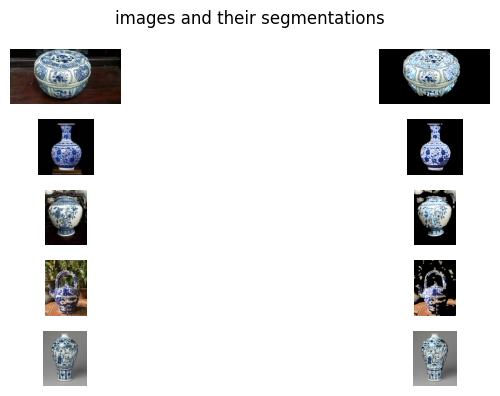

In [5]:
blue_low = (90, 50, 50)
blue_high = (130, 255, 255)

white_low = (61, 69, 68)
white_high = (255, 255, 255)

def color_seg (img,color_low1,color_high1,color_low2,color_high2,smooth=True):
    """Args:
    img:source image RGB
    color low and high :tuples of colors in HSV
    smooth : boolean which control whether image will be blurred"""
    img_ori=img.copy()
    if smooth:
        img = cv.GaussianBlur(img,(5,5),0)
    #change color space
    img_hsv = cv.cvtColor(img,cv.COLOR_RGB2HSV)
    
    #mask and result
    mask1 = cv.inRange(img_hsv,color_low1,color_high1)
    mask2 = cv.inRange(img,color_low2,color_high2)
    
    #morphological operations
    mask1 = cv.erode(mask1,None,iterations=2)
    mask1 = cv.dilate(mask1,None,iterations=2)
    result_blue=cv.bitwise_and(img_ori,img_ori,mask=mask1)
    
    mask2 = cv.erode(mask2,None,iterations=2)
    mask2 = cv.dilate(mask2,None,iterations=2)
    result_white = cv.bitwise_and(img_ori,img_ori,mask=mask2)
    
    result = cv.add(result_blue, result_white)
    return result

imgs=[]
for i in range(1,6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/porcelain{i}.jfif"))
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    imgs.append(img)

res = [color_seg(im,blue_low,blue_high,white_low,white_high) for im in imgs]

fig ,ax = plt.subplots(5,2,figsize=(10,4))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis('off')
    
fig.suptitle("images and their segmentations")
plt.tight_layout()
plt.show()